In [197]:
import tweepy
from datetime import datetime, timedelta
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime, timedelta
from pytrends.request import TrendReq
import nltk
import wordcloud
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob
import re
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikigelkott/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikigelkott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install textblob
pip install wordcloud 
nltk.download('averaged_perceptron_tagger')

# Analysing social feedback  on both smartphones via Twitter  

Relevant hashtags for Google pixel phone: googlepixel6 pixel6 pixel6pro
Relevant hashtags for Apple  iphone: iphone13, iphone13pro

In [12]:
CONSUMER_API_KEY = '6zZZTmuE2YtTGs8ImPIEPUvPy'
CONSUMER_API_SECRET = 'fmml7MB3k2uc6cjfA17Xgp8BI5bqgQhAbnImfA3haNWVnj6OL7'
ACCESS_KEY = '1453646935903117313-Ij4v9NtdOvYDAVAMOo2GAo0TgOxsQy'
ACCESS_SECRET = 'wO8HfEf8kz58BF90bw4LnwmQcfF2BKipJnCwY8M0IqQMJ'

In [137]:
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

## Define functions to proceed sentiment analysis of tweets

In [11]:
def cleanText(text):
    text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
  # Removes any link in the text
    text = re.sub('http://\S+|https://\S+', '', text)
  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
  # Removes stop words that have no use in sentiment analysis 
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if not word in stopwords.words()]
    text = ' '.join(text)
    return text

In [29]:
def stem(text):
  # This function is used to stem the given sentence
    porter = PorterStemmer()
    token_words = word_tokenize(text)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

In [168]:
def fetch_tweets(query,start_day):
    fetched_data=[]
    for i in tweepy.Cursor(api.search,q=query,
                             include_rts=True,lang="en",
                             since=str(start_day.date())).items():
        fetched_data.append(i)
        print(len(fetched_data))
    return fetched_data

In [243]:
def tweet_results(fetched_data):
    tweets = [] # Empty list that stores all the tweets
    # Fetches the tweets using the api                       
    for tweet in fetched_data:
        txt = tweet.text
        tweet_day=tweet.created_at.date()
        clean_txt = cleanText(txt) # Cleans the tweet
        stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
        #sent = sentiment(stem_txt) # Gets the sentiment from the tweet
        sent=stem_txt.sentiment.polarity
        tweets.append((tweet_day,txt, clean_txt, sent))
    df = pd.DataFrame(tweets, columns= ['day','tweets', 'clean_tweets','sentiment'])
    df = df.drop_duplicates(subset='clean_tweets')
    return df

In [189]:
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

In [247]:
start_day = datetime.utcnow() - timedelta(days=8)
query1 = "#iphone13 OR #iphone13pro"
iphone_tweets_1=fetch_tweets(query1,start_day)
query2="#googlepixel6 OR #pixel6pro OR #pixel6"
iphone_google_1=fetch_tweets(query2,start_day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716


5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360


826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060

2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703


4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352


5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001


In [252]:
df_google = tweet_results(iphone_tweets_1)
df_iphone = tweet_results(iphone_google_1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3


1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
1
2
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
1
2
3


1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3

1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
1
2
3
4
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2


1
2
3
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10

1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3


1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9


1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4

1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1

1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
1
2
3
4
5

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9

1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1

1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8

1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
1
2

1
2
3
4
5
6
7
1
2
3
1
2
3
4
5
6
7
8
1
2
3
1
2
3
4
5
6
7
1
2
3
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
1
2
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9

1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
1
2
3
1
2
3
4
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
1
2
3
4
5
6
7
8
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2


1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
1
2
3
4


1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
1
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
1
2
3
4
1
2
3
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


1
2
3
4
5
6
7
8
9
10
1
2
3
4
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
1
2
3
4
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
1
2
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12


1
2
3
4
5
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1
2
3
4
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
4
5
6
7
8
1
2
3
4
1
2
3
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
1
2
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
1
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
1
2

1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
1
2
3
4
5
6
7
8
9
1
2
3
4
1
2
3
4
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11


In [ ]:
df_google=df_iphone.copy()
df_iphone=

In [253]:
df_google.to_pickle("./df_google.pkl")
df_iphone.to_pickle("./df_iphone.pkl")

## Open the scrapped dataset

In [318]:
df_iphone = pd.read_pickle("./df_google.pkl")
df_google= pd.read_pickle("./df_iphone.pkl")

In [319]:
iphone_count = df_iphone.groupby('day')['day'].count().reset_index(name='count')
google_count = google_count.groupby('day')['day'].count().reset_index(name='count')

In [359]:
print(str(len(df_iphone))+' is number of tweets about iphone 13&pro from 02.11 to 10.11 13:37 is ')
print(str(len(df_google))+' is number of tweets about google pixel 6&pro from 02.11 to 10.11 13:37 is ')

2110 is number of tweets about iphone 13&pro from 02.11 to 10.11 13:37 is 
4048 is number of tweets about google pixel 6&pro from 02.11 to 10.11 13:37 is 


## Explore the tweeting trend for both smartphones

In [321]:
combined_count=pd.merge(iphone_count,google_count,how='outer',on='day')
combined_count=combined_count.rename(columns={"count_x": "count_iphone", "count_y": "count_google"})
combined_count

,day,count_iphone,count_google
0,2021-11-02,316,566
1,2021-11-03,210,445
2,2021-11-04,232,522
3,2021-11-05,229,574
4,2021-11-06,229,505
5,2021-11-07,210,378
6,2021-11-08,236,407
7,2021-11-09,274,425
8,2021-11-10,174,226


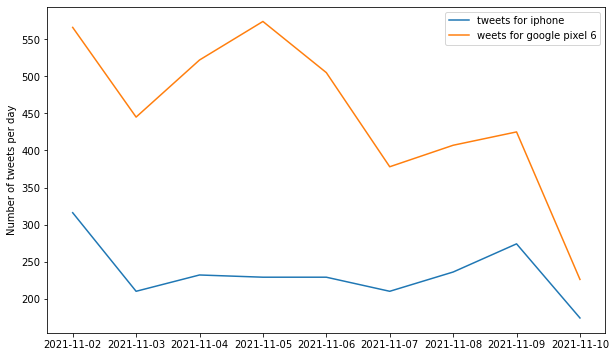

In [360]:
fig=plt.figure(figsize=(10,6))
ax1=plt.plot(combined_count.day, combined_count.count_iphone,label='tweets for iphone')
ax2=plt.plot(combined_count.day, combined_count.count_google,label='weets for google pixel 6')
plt.legend()
plt.ylabel('Number of tweets per day')
plt.show()
#need to annotate y axis

## What is the polarity distribution for both smartphones?

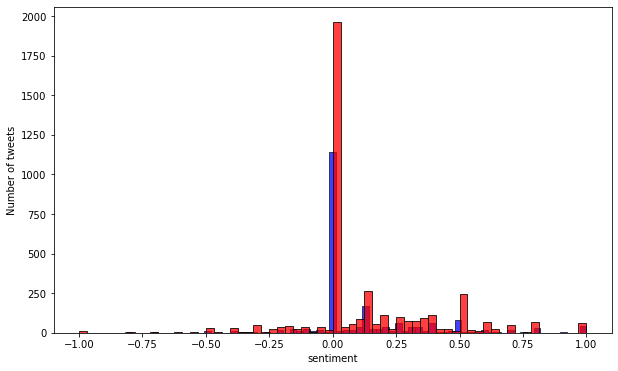

In [405]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df_iphone, x="sentiment",color='b')
sns.histplot(data=df_google, x="sentiment",color='r')
plt.ylabel("Number of tweets")
plt.show()
#need some design. Red for Iphones

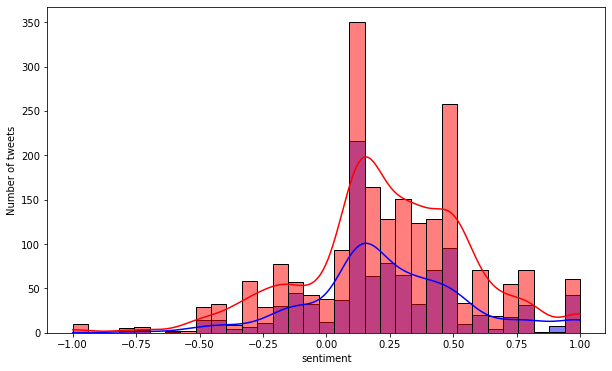

In [404]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df_iphone[df_iphone.sentiment!=0], x="sentiment",color='b',kde='True')
sns.histplot(data=df_google[df_google.sentiment!=0], x="sentiment",color='r',kde='True')
plt.ylabel("Number of tweets")
plt.show()
#need some design. Red for Iphones

## Positive feedback tweets (polarity==1)

### 15 most positive tweets on iphone 13&pro

In [396]:
k=0
for i in df_iphone.loc[df_iphone.sentiment>0.7,'clean_tweets']:
    k+=1
    if k<15:
        print(i)

gadgetzkart best place buy type design cases iphone13 iphone iphone13pro
sellbuyrepair iphones best price sg sgmobmart sgbuyback sgfonefix sgipad iphone13
rt time avail best icc world cup 2021 20 running waitin
best cases iphone 13 pro max 2021 iphone13pro iphone13 mobiletechnology phone technology
rt sellbuyrepair iphones best price sg sgmobmart sgbuyback sgfonefix sgipad iphone12 iphone1
time avail best icc world cup 2021 20 running
sellbuyrepair iphones best price sg sgmobmart sgbuyback sgfonefix sgipad iphone12
rt iphone 13 pro user review practically brilliant boring iphone13pro
best iphone 13 pro max magsafe cases buy iphone13pro iphone13 iphone technology mobile
rt trendy phone case designs offer best phone cases iphone13 iphone13mini iphone13pro ip
trendy phone case designs offer best phone cases iphone13 iphone13mini iphone13pro fo
rt protective phone cases myphotograph premium protection brilliant design impact
protective phone cases myphotograph premium protection brilliant 

### 15 most positive tweets on google 13&pro

In [399]:
k=0
for i in df_google.loc[df_google.sentiment>0.7,'clean_tweets']:
    k+=1
    if k<15:
        print(i)

rt win google pixel6 android headlines us giveaway pixel6launch
rt google pixel 6 could perfect android
win google pixel6 android headlines us giveaway
google pixel 6 could perfect android
sellbuyrepair google smartphones best price pixel6pro pixel6 googlepixel sgmobmart
rt great look thanks pixel6pro rhinoshield
rt sellbuyrepair google smartphones best price pixel6pro pixel6 googlepixel sgmobmart sgbuyba
rt celebrations become alive comes together best part season spending lots lots
great look thanks pixel6pro rhinoshield
weve updated best smartphone camera 2021 guide phone make list
rt pixel 6s software could google wins samsung galaxy fans pixel6 smartphon
best smartphone unbeatable teampixel pixel6pro
tried buy pixel6pro store went chance win tmobiletuesdays
rt google pixel 6 pro vs samsung galaxy s21 ultra android phone wins pixel6pro galaxys


## Negative feedback tweets (polarity==-1)

In [402]:
for i in df_iphone.loc[df_iphone.sentiment<-0.5,'clean_tweets']:
    print(i)

stupid looks show delivery boy assuming profession carrying iphone13 iphone13promax
chicken design iphone 13 pro casemate case personalise text iphone13pro iphone13
iphone idiot phone iphone13
iphone 13 pro max bad iphone13pro
motion sick using android12 shockingly bad exclusively interns project
iphone13 night mode aint bad
people beware worst customer service order order supposed arrive today update called


In [403]:
for i in df_google.loc[df_google.sentiment<-0.5,'clean_tweets']:
    print(i)

would avoid google phones considering pixel6 pixel6pro worst cust
rt worst experience tforce delivery really screwed pooch using pi
worst experience tforce delivery really screwed pooch using
pixel6 possibly worst phone experience since nokia 96 fingerprint sensor doesnt work
anyone gon talk pixel6pro portrait mode bad embarrassed upload
seeing many complaints online pixel6pro fingerprint sensor crap perfectly fin
amongst two based twitter nerds choice might pixel6pro
youve got bring toys inside cold outside pixel6pro
disappointed bad selfie camera pixel6 thought
pixel6 camera bad help previous tweet dm unreplied
pixel6pixelbuds owners anyone else getting really bad audio cutting using pixel 6
setting bad boy tonight wish luck pixel6pro
google phones quality service worst market purchased pixel 4a screen stop working within 10 days
official google 30w charger arrived yesterday pixel6 charging results observed based power meter
fingerprint pixel6pro bad lawsuit
rt worst thing pixel6 mad

## What are the most common adjective used in texts?

In [336]:
adj_google=[]
for i in df_google['clean_tweets']:
    a=get_adjectives(i)
    adj_google.extend(a)

In [340]:
adj_iphone=[]
for i in df_iphone['clean_tweets']:
    a=get_adjectives(i)
    adj_iphone.extend(a)

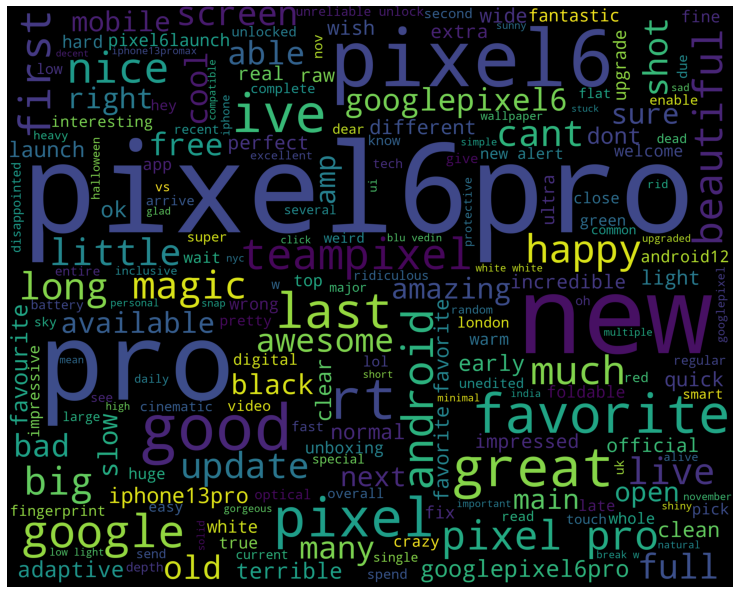

In [341]:
twt = " ".join(adj_google)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

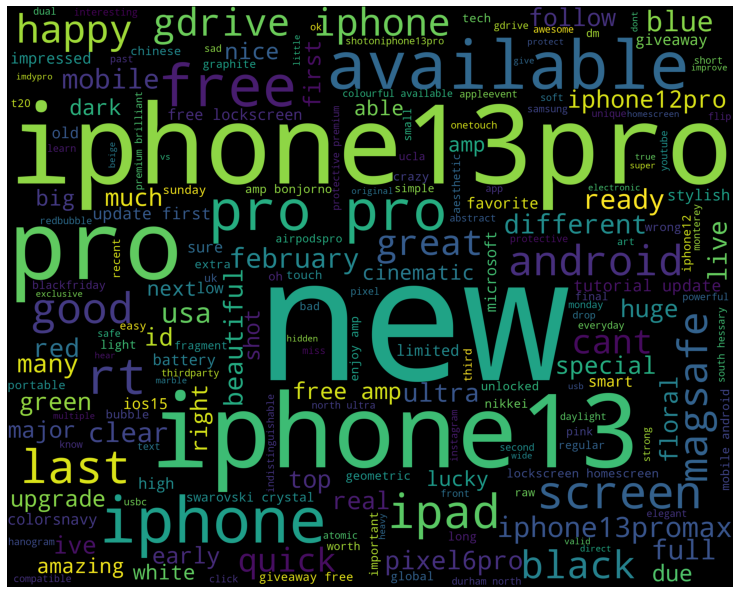

In [342]:
twt = " ".join(adj_iphone)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Appendix

In [ ]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
    if cleaned_text.sentiment.polarity > 0:
        return 'very positive'
    elif cleaned_text.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [237]:
open_file = open('tweets_google_full.pkl', "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [242]:
print((loaded_list[0].created_at.date()))

2021-11-09
